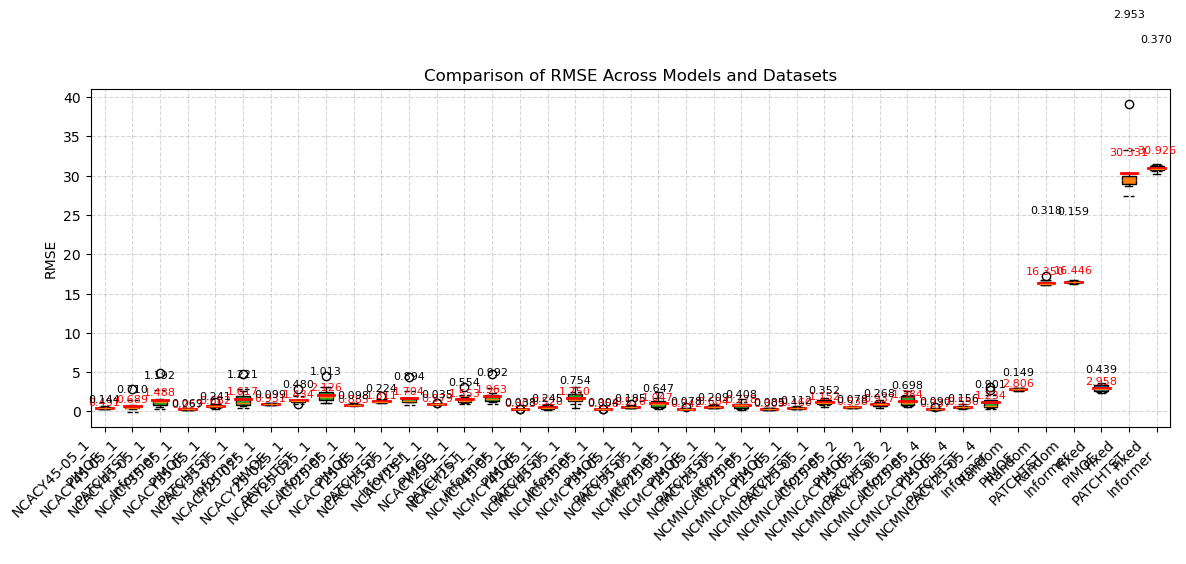

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
def plot_six_boxplots(groups_data, model_names, group_names):

    num_models = len(model_names)

    all_data = []
    for group in groups_data:
        all_data.extend(group)

    model_colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] 
    colors = [model_colors[i%num_models] for i in range(len(all_data))]

    plt.figure(figsize=(12, 6))
    box = plt.boxplot(all_data, patch_artist=True, whis=1.5) 

    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    for i, data in enumerate(all_data):
        mean_val = np.mean(data)
        std_val = np.std(data)

        plt.plot([i+0.7, i+1.3], [mean_val, mean_val], 
                color='red', linewidth=2, linestyle='-')

        plt.plot([i+0.8, i+1.2], [mean_val - std_val, mean_val - std_val], 
                color='black', linewidth=1, linestyle='--')
        plt.plot([i+0.8, i+1.2], [mean_val + std_val, mean_val + std_val], 
                color='black', linewidth=1, linestyle='--')

        plt.text(i+1, mean_val + 0.05*max(data), f'{mean_val:.3f}', 
                ha='center', va='bottom', color='red', fontsize=8)
        plt.text(i+1, mean_val + 0.5*max(data), f'{std_val:.3f}', 
                ha='center', va='bottom', color='black', fontsize=8)

    xtick_labels = []
    for i, group in enumerate(group_names):
        for j, model in enumerate(model_names):
            xtick_labels.append(f"{group}\n{model}")
    
    plt.xticks(range(1, len(all_data)+1), xtick_labels, rotation=45, ha='right')
    
    plt.title('Comparison of RMSE Across Models and Datasets')
    plt.ylabel('RMSE')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

def reproduce_boxplots_from_csv(csv_path, output_dir=None):
    """Reproduce both boxplots from raw data CSV file"""

    df = pd.read_csv(csv_path)

    model_names = df['model'].unique()
    group_names = df['group'].unique()
    mape_groups_data = []
    for group in group_names:
        group_data = []
        for model in model_names:
            mape_values = df[(df['group'] == group) & (df['model'] == model)]['mape'].values
            group_data.append(mape_values)
        mape_groups_data.append(group_data)
    
    plot_six_boxplots(mape_groups_data, model_names, group_names)
    
if __name__ == "__main__":
    csv_path = r'D:\Gitload\PIMOE\Fig 3c\fig3c.csv'
    reproduce_boxplots_from_csv(csv_path)